In [92]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.pipeline import make_pipeline 
from sklearn.ensemble import RandomForestClassifier
from string import punctuation
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
punctuation = punctuation + '\n' + '—' + '“' + ',' + '”' + '‘' + '-' + '’'
import re


In [123]:
df = pd.read_csv('./bbc-news-data.csv',sep='\t')
df.head()

category filename                              title  \
0  business  001.txt  Ad sales boost Time Warner profit   
1  business  002.txt   Dollar gains on Greenspan speech   
2  business  003.txt  Yukos unit buyer faces loan claim   
3  business  004.txt  High fuel prices hit BA's profits   
4  business  005.txt  Pernod takeover talk lifts Domecq   

                                             content  
0   Quarterly profits at US media giant TimeWarne...  
1   The dollar has hit its highest level against ...  
2   The owners of embattled Russian oil giant Yuk...  
3   British Airways has blamed high fuel prices f...  
4   Shares in UK drinks and food firm Allied Dome...

In [124]:
X,y = df.loc[:,'content'], df.loc[:,'category']
X.shape == y.shape

True

In [122]:
def preprocessing(text):
    # removing non alphanumeric characters
    text = re.sub(r'[^A-Z a-z 0-9]','',text)

    #removing punctuations
    text =  ''.join(char for char in text if char not in punctuation)
    
    #removing trailing whitespaces again
    text = re.sub(r' +',' ', text)
    
    #removing the stopword
    text =  ' '.join(word for word in text.split() if word not in stop_words)


    return text.lower()

In [125]:
X = X.apply(lambda x:preprocessing(x))

In [126]:
X.shape

(2225,)

In [9]:
from sklearn.datasets import fetch_20newsgroups

In [10]:
train = fetch_20newsgroups(subset='train')
test = fetch_20newsgroups(subset='test')

In [98]:
pipe = make_pipeline(TfidfVectorizer(),LogisticRegression())
pipe

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [127]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(y)
X_train , X_val, y_train, y_val = train_test_split(X,labels,test_size=0.2,stratify=labels,random_state=42)

In [128]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [129]:
y_pred = pipe.predict(X_val)
f1_score(y_val,y_pred,average='weighted')

0.9887325858141044

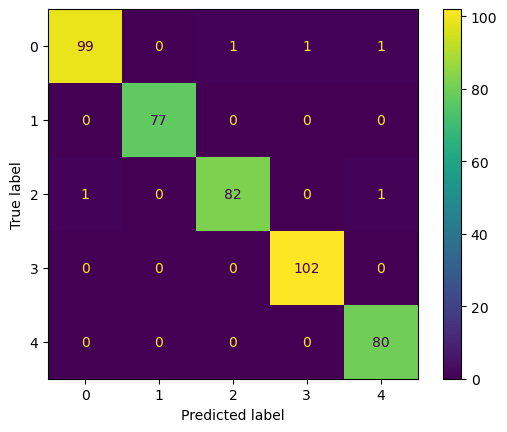

In [106]:
cm = confusion_matrix(y_val,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [130]:
text ='''
 With each passing day, The Kerala Story is becoming strong at the box office. The film is inching close to Rs 150 crore mark and has also surpassed Salman Khan’s recently released Kisi Ka Bhai Kisi Ki Jaan. However, The Kerala Story’s lead actress Adah Sharma never expected the movie to perform this well at the box office. In an exclusive interview with News18 Showsha, Adah confessed she never thought that “crores of people" would watch her movie.

“As an actor, I don’t know all these figures. We do all this hoping people watch it. I knew that this was a subject that if people would watch, they would connect emotionally with it. That mother-daughter emotion is really strong in the film. That is what touched me when I heard the script. It is a haunting thing. It is scary. I thought that if the mother-daughter connects (with the audience), it will really work. But I didn’t expect this. I didn’t expect so many crores of people to watch it," she told us.

Adah further revealed that even The Kerala Story’s global release was never part of the plan. She shared that a decision regarding the same was taken after the film received an overwhelming response in India. Adah claimed that after the India release, distributors from several countries including Denmark and Sweden contacted the makers and that’s when it was decided that The Kerala Story would release in 37 countries.

“It was definitely not a plan in the beginning. As you know, it is not a big-budget movie. That (global release) was not the plan. After it released in India, a lot of people were expressing their views and were writing about it. Abroad, this ISIS bride is a situation that everyone addresses and speaks about very openly. There are a lot of activists talking about it. Everyone knows that it exists and therefore, they want to get terrorism out. When they got to know what the subject is, we got calls from Denmark, Sweden, Ireland and Korea. So many places showed interest to release the film," Adah said.

From collecting Rs 8.05 crore on its opening day to recording a massive Rs 23.75 crore collection on its second Sunday; Adah Sharma mentioned that the film has proved that word-of-mouth is the best promotion for a good movie. She further slammed those who are calling her film ‘propaganda’ and sent out a strong message for all by saying, ‘terrorism is real’.

“They cannot say it is some political party agenda. They cannot bring in elections also now because all of this is over and the film is doing even better now than it was before. They cannot call it propaganda because people from abroad are also saying that such things actually exist. People are putting out actual testimonials. I think we are now getting love from people because everything is available in the public domain. People are showing so much support and love for our film because they can see that terrorism is real. I am really happy," the 31-year-old actress said.

Adah further called The Kerala Story a ‘movement’ and wondered why some people have an issue with the film. She admitted that before the release, she was thinking if terror organisations will have a problem with her movie. “Once people have watched the movie, then nobody has had a problem. They can see that it is only about terrorism. I don’t know why some people have a problem with it in the first place. In the first line of the trailer, there is a man who says in English, ‘please tell me how you joined ISIS’ and in Hindi, I replied, ‘ISIS kab join kiya yeh jaane ke liye, kyu aur kaise join kiya, yeh jaana zaroori hai’. We had made our stance. I had asked if terror organisations are going to have a problem because we openly saying ISIS. I didn’t know people will have a problem with it. I thought people will be like, ‘wow, it is an anti-terrorism film’, ‘we should all watch it’," she shared.

A section of the audience is not only calling The Kerala Story ‘propaganda’ movie but is also sending threat messages to the cast and crew members. Last week, the film’s director, Sudipto Sen informed police that one of the crew members received a threatening message which read, “They did not do a good thing by showing the story."
top videos

    SidKiara Share Unseen Pics From Wedding Ceremonies | Alia Bhatt Jets Off For Gucci Event | News Wrap
    Shah Rukh Khan's Don 3 Is On Track; Farhan Akhtar Is Completing The Script | How Will It Fare?
    Priyanka Chopra, Alia Bhatt, Anushka & Kareena Kapoor | Let's Celebrate New-Age Moms On Mother's Day
    Parineeti Chopra & Raghav Chadha Exchange Rings; Wishes Pour In | Priyanka Chopra Stuns In Yellow
    Parineeti Chopra & Raghav Chadha Are Now Engaged To Be Married | FIRST PHOTOS OF THE COUPLE ARE OUT

The situation is a little different for Adah. She shared how even a single hate message around her film is now flooded with replies from people supporting the movie. Adah also questioned those spreading hate on social media regarding The Kerala Story and wondered if they are paid to say such things.

“Even one negative comment has so many people supporting me under it. But also, have you seen the movie and then are you saying things? No. Without watching the film people are saying certain things. Maybe it is because they have their own political agenda or they want to connect it with the propaganda of their own or are paid to say it, or maybe they have their own propaganda and that’s why they are compelled to say things. But I think everyone should have his/her opinion… I am totally against terrorism and hence, I stand with the movie which is against terrorism," Adah concluded.
About the Author

Chirag Sehgal
Chirag Sehgal, Sub Editor at News18, covers Bollywood, television and K-pop group BTS. Apart from digging deep into the world of television and Bollyw...Read More
Tags:

    Adah SharmabollywoodShowsha ExclusivesThe Kerala Story

first published:May 16, 2023, 09:07 IST
last updated:May 16, 2023, 09:08 IST
'''
text = preprocessing(text)

In [135]:
pipe.predict(pd.Series(text))[0]

1

In [132]:
text

'with passing day the kerala story becoming strong box office the film inching close rs 150 crore mark also surpassed salman khans recently released kisi ka bhai kisi ki jaan however the kerala storys lead actress adah sharma never expected movie perform well box office in exclusive interview news18 showsha adah confessed never thought crores people would watch movieas actor i dont know figures we hoping people watch i knew subject people would watch would connect emotionally that motherdaughter emotion really strong film that touched i heard script it haunting thing it scary i thought motherdaughter connects audience really work but i didnt expect i didnt expect many crores people watch told usadah revealed even the kerala storys global release never part plan she shared decision regarding taken film received overwhelming response india adah claimed india release distributors several countries including denmark sweden contacted makers thats decided the kerala story would release 37 co

In [137]:
label_encoder.classes_

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)